<a href="https://colab.research.google.com/github/paulapipkin/Cervical_Cancer_Risk-Factor/blob/main/Project_2_Cervical_Cancer_Risk_Paula_Pipkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cervical Cancer Risk - Project 2

- Paula Pipkin
- 8/4

###Intro

- Cervical Cancer Risk Factor Dataset (**Note**: CC = Cervical Cancer**)

1) Source of data
- https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29# (UCI Machine Learning Repository)

2) Brief description of data
- This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.


3) What is the target?
- Feature Biopsy {1: Positive for CC, 0: Negative for CC}

4) Is this a classification or regression problem?
- Classification

5) How many features?
- 35 + Target

6) How many rows of data.
- 858

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- Facing so many variables, I believe my greatest challange will be finding the best model, I might have to try a few to see which one will be more adequated 

**Some Data	Description**

- **Hinselmann** : A test method for cervical cancer by examining the cells on an instrument called colposcope.
- **Schiller** : A test in which iodine is applied to the cervix. The iodine colors healthy cells brown; abnormal cells remain unstained, usually appearing white or yellow.
- **Citology**: Also called the Pap test or Pap smear, testing for human papillomavirus (HPV).
- **Biopsy**: A surgical extraction to collect sample cells or tissues for further examination to identify the presence or extent of a disease.



### Part 0 - Import Libraries and Load Data

In [161]:
import pandas as pd
import numpy as np

#prepare for ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import  make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as smote_pipe

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay

#plot
import matplotlib.pyplot as plt

#customize
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')



In [162]:
df = pd.read_csv('/content/drive/MyDrive/BootCamp/PROJECT 2/risk_factors_cervical_cancer (1).csv')
print(df.shape)
print(df.isna().sum().sum())
df.head()

(858, 36)
0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### Part 1 - Clean and explore the data set

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

- Many of the columns have '?' instead of a nan value, this is causing many coluns to be innterpreted as type object, and is also not computing the null values, so my first step is replacing all '?' with 'NaN'

In [164]:
df.replace('?', np.NaN, inplace=True)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

- Next I will convert all my object colums to float, since all my featureas are either a integer  or a 0/1 input


In [166]:
obj_cols = df.select_dtypes(exclude=['int64']).columns

df[obj_cols] = df[obj_cols].astype(float)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [168]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [169]:
df.duplicated().sum()

23

In [170]:
df.drop_duplicates(inplace=True)
df.shape

(835, 36)

- Target row has no missing values

In [171]:
df['Biopsy'].value_counts(normalize=True)

0    0.935329
1    0.064671
Name: Biopsy, dtype: float64

-  Data is not balanced

 - Columns STDs: Time since first diagnosis and STDs: Time since last diagnosis are missing 94% of the data, I'll drop those columns

In [172]:
df.drop(columns=[ 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace=True)

In [173]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,735.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,0.002721,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,0.052129,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A value that cough my attention was 11 pregnacies, I will check this person's age to see if that was possible


In [174]:
df_prego = df.loc[df['Num of pregnancies']>6]
df_prego

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
17,43,3.0,15.0,8.0,0.0,0.000000,0.000000,1.0,3.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
100,34,3.0,15.0,7.0,0.0,0.000000,0.000000,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0
263,23,2.0,14.0,7.0,1.0,1.266973,0.513202,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
337,48,2.0,16.0,7.0,1.0,32.000000,8.000000,1.0,7.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
480,30,4.0,13.0,8.0,0.0,0.000000,0.000000,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
588,45,5.0,15.0,7.0,0.0,0.000000,0.000000,1.0,0.66,0.0,...,0.0,0,0,0,0,0,0,0,0,0
668,84,3.0,20.0,11.0,1.0,24.000000,0.513202,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,1,0,0
679,50,2.0,17.0,7.0,0.0,0.000000,0.000000,1.0,5.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
682,70,1.0,16.0,10.0,0.0,0.000000,0.000000,0.0,0.00,1.0,...,0.0,0,0,0,0,0,0,0,0,0
740,40,1.0,20.0,7.0,0.0,0.000000,0.000000,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0


- Copying data for ML vs EDA

### Part 2

In [175]:
df_ml =  df.copy()

- I will use mode ( most frequenty) to handle the missing values, but I want to use the whole dataset for EDA, that is why I'm making a copy of it, because in ML I will only input the missing values on the training data

In [176]:
for col in df.columns:
  df[col].fillna(df[col].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    float64
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

- Univariate visuals 

-  This dataset has some of its features already "encoded", so I will create a univariate visual for the first 4 columns to understand a little more about our data, instead of creating it for all of the features

In [177]:
df1_variable = df.iloc[: , :4]
df1_variable.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies'],
      dtype='object')

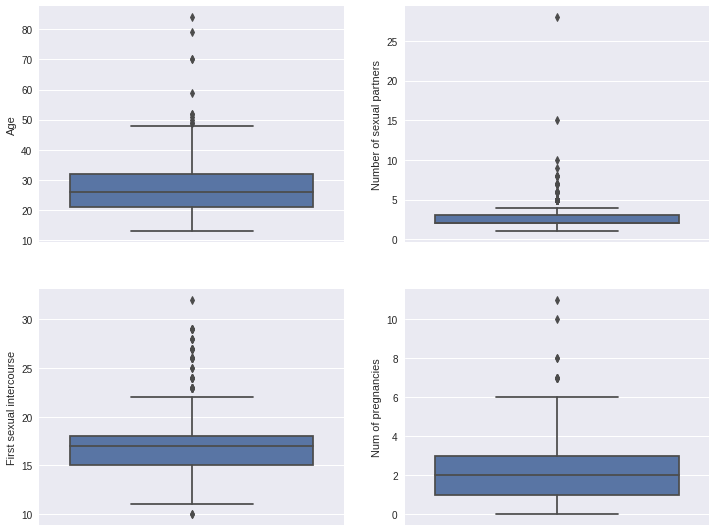

In [178]:
fig, axes = plt.subplots(2,2, figsize = (12, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.2,  bottom=0.1,  top=1)
axes = axes.ravel() # https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

for i, col in enumerate(df1_variable.columns):
  sns.boxplot(y=col ,  data=df1_variable,  orient='v' , ax=axes[i])


### Part 3



---



---



**3.1** For this part of the project, I will continue my EDA by:
- Identifying any moderate or strong correlations between my target and my features and/or between one feature and another
- Creating multivariate exploratory visuals to further understand my data

**Note: CC = Cervical Cancer**

- Correlation

In [179]:
corr = df.corr()

In [180]:
res = corr.loc[abs(corr['Biopsy'])>0.1]
res.sort_values(by='Biopsy', ascending=False)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Biopsy,0.054396,-0.008566,0.010063,0.027998,0.028104,0.061168,0.024261,-0.015954,0.098561,0.059116,...,-0.012884,0.097813,0.162142,0.114026,0.162142,0.158773,0.552471,0.728870,0.313286,1.000000
Schiller,0.101150,-0.015592,0.005641,0.076933,0.050805,0.093039,0.016484,-0.034122,0.100774,0.095565,...,-0.015166,0.130780,0.158419,0.008753,0.158419,0.099014,0.654622,1.000000,0.349939,0.728870
Hinselmann,-0.009050,-0.042430,-0.017284,0.030710,0.031099,0.068794,0.024967,0.008935,0.051845,0.050353,...,-0.010249,0.075276,0.133550,-0.021833,0.133550,0.071321,1.000000,0.654622,0.194625,0.552471
Citology,-0.019194,0.016327,-0.008013,-0.019987,-0.005109,-0.007661,0.004103,-0.021981,0.085732,0.013144,...,-0.011417,0.055537,0.114660,-0.024322,0.114660,0.089644,0.194625,0.349939,1.000000,0.313286
Dx:HPV,0.099765,0.026758,0.043836,0.052006,0.008109,0.054286,0.108397,0.026803,0.064905,0.060931,...,0.330117,-0.016613,0.886441,-0.015494,1.000000,0.616069,0.133550,0.158419,0.114660,0.162142
Dx:Cancer,0.108519,0.021770,0.067317,0.040574,-0.015159,0.051743,0.106506,0.008898,0.063383,0.116052,...,0.330117,-0.016613,1.000000,-0.015494,0.886441,0.665423,0.133550,0.158419,0.114660,0.162142
Dx,0.089979,0.022340,0.035497,-0.005974,-0.071500,-0.051679,-0.035248,-0.010437,-0.010292,0.134500,...,0.138204,-0.003645,0.665423,0.606787,0.616069,1.000000,0.071321,0.099014,0.089644,0.158773
STDs:genital herpes,-0.028689,-0.032161,0.024606,-0.029206,-0.014392,-0.010402,-0.007095,0.022960,-0.016874,-0.011504,...,-0.001697,0.102946,-0.005140,-0.003614,-0.005140,-0.005957,-0.007243,-0.010718,-0.008068,0.131688
STDs:HIV,0.001526,0.016782,-0.008995,0.011994,0.054643,0.087869,0.053226,-0.080623,-0.037118,0.005809,...,-0.007273,0.549022,-0.022032,0.064366,-0.022032,0.023820,0.092401,0.129225,0.077349,0.128614
STDs,0.017910,0.051262,-0.003326,0.050703,0.108101,0.086930,0.027534,-0.052189,0.002820,0.056719,...,0.151579,0.907582,0.008368,0.005885,0.008368,-0.006629,0.054899,0.117248,0.054280,0.114650


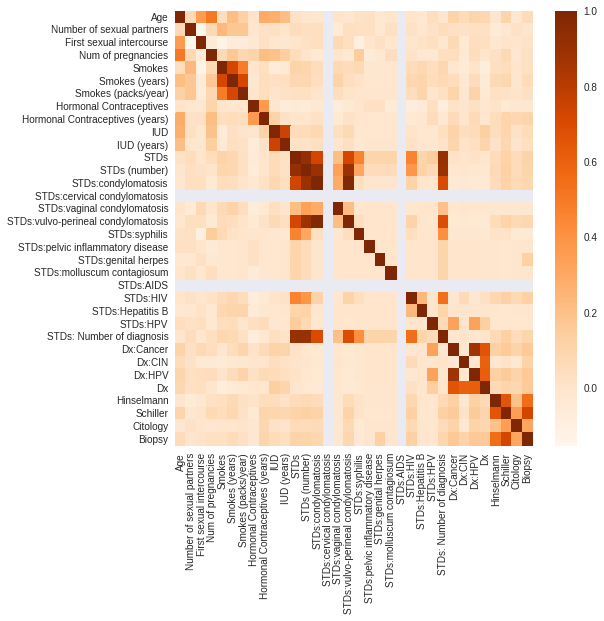

In [181]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=False, cmap="Oranges");

- Visualizing correlations with the target

In [182]:
def plot_feature(feature):

  fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(10,4))

  df.loc[df.loc[:,'Biopsy'] == 0,feature].hist(bins=5, edgecolor='black', ax = axes[0], density=True)
  axes[0].set_title('Negative for CC', fontsize=12)
  axes[0].set_xlabel(feature)
  
  df.loc[df.loc[:,'Biopsy'] == 1,feature].hist(bins=5, edgecolor='black', ax = axes[1], density=True)
  axes[1].set_title('Positive for CC', fontsize=12)
  axes[1].set_xlabel(feature);

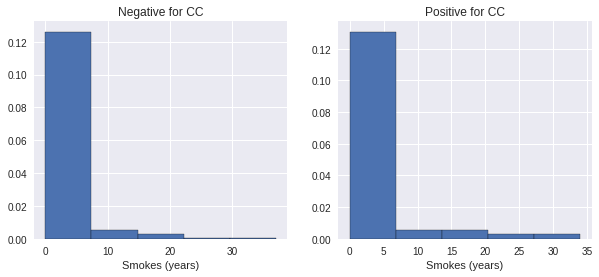

In [183]:
plot_feature('Smokes (years)')

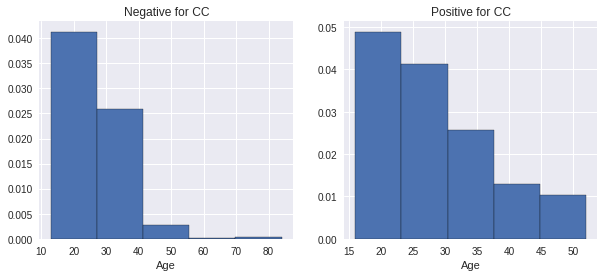

In [184]:
plot_feature('Age')

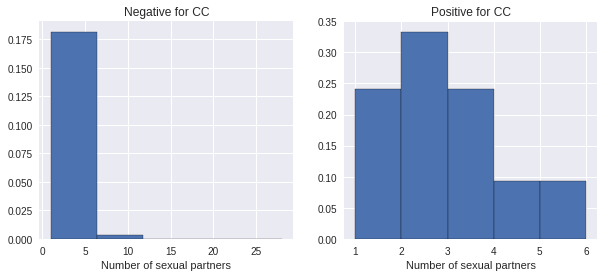

In [185]:
plot_feature('Number of sexual partners')



---



---



**3.2** From my data analysis, I'll create two visuals that demonstrate key findings of interest to a stakeholder. 
- These visuals should be reporting quality.  
- Be sure to explain the finding associated with each visual.  (NO histograms, boxplots, or correlation plots)

- HPV seems to have a great relationship with Cervical Cancer, let's check:

In [186]:
df_coded = df.copy()
df_coded['Biopsy'].replace({0:'No', 1:'Yes'}, inplace = True)
df_coded['Dx:HPV'].replace({0:'No', 1:'Yes'}, inplace = True)

x1 = df_coded.groupby('Dx:HPV')['Biopsy'].value_counts(normalize=True).to_frame('Percentage').reset_index()
x1

,Dx:HPV,Biopsy,Percentage
0,No,No,0.941248
1,No,Yes,0.058752
2,Yes,No,0.666667
3,Yes,Yes,0.333333


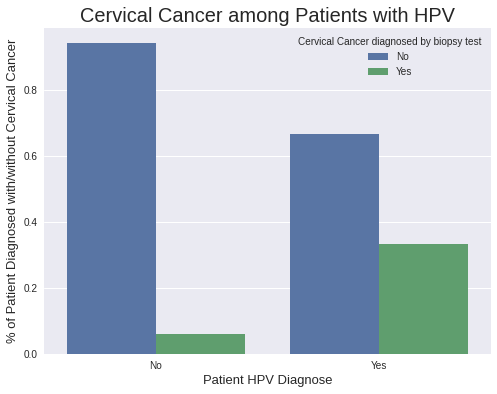

In [187]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x="Dx:HPV",  y='Percentage', hue="Biopsy", data=x1)
ax.set_xlabel('Patient HPV Diagnose', fontsize=13)
ax.set_ylabel('% of Patient Diagnosed with/without Cervical Cancer', fontsize=13) 
ax.set_title('Cervical Cancer among Patients with HPV', fontsize = 20)
plt.legend(title='Cervical Cancer diagnosed by biopsy test')
plt.savefig('plot1.png', bbox_inches = 'tight',);

- Out of 835 patients, 1/3 or 33% of those patients diagnosed with HPV were also diagnosed with cervical cancer, only 5% of those without HPV were diagnosed with Cervical Cancer. 

- "Virtually all cervical cancers are caused by HPV. Routine screening can prevent most cervical cancers by allowing health care providers to find and remove precancerous cells before they develop into cancer."  (source: https://www.cancer.gov/about-cancer/causes-prevention/risk/infectious-agents#hpv)

- That is why it is important to invest in prevention.

- Now, I will separate the data in 3 groups, patients that have been using Hormonal Contraceptives for 10 or more than 10 years, for less than 10 years, and those that have never used them, and compare the cervical cancer rates among them

In [188]:
greater_10 = df.loc[df['Hormonal Contraceptives (years)']>=10]
less_10 = df.loc[(df['Hormonal Contraceptives (years)']>0) & (df_coded['Hormonal Contraceptives (years)']<10)]
no_hc = df.loc[(df['Hormonal Contraceptives (years)']==0)]

g_10 = ((greater_10['Biopsy'].sum())/len(greater_10)*100).round(2)
g_less = ((less_10['Biopsy'].sum())/len(less_10)*100).round(2)
no_hc = ((no_hc['Biopsy'].sum())/len(no_hc)*100).round(2)

label1 =['Equal or more than 10', 'Less than 10, more than 0', 'None']
totals1 =[g_10,g_less, no_hc]
x2 = pd.DataFrame()
x2['labels']= label1
x2['percentage'] = totals1


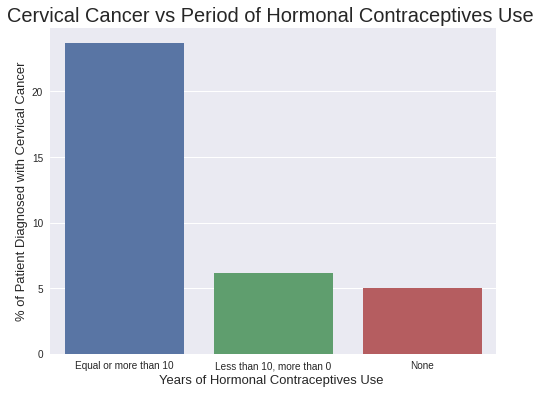

In [189]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x="labels",  y='percentage',  data=x2)
ax.set_xlabel('Years of Hormonal Contraceptives Use ', fontsize=13)
ax.set_ylabel('% of Patient Diagnosed with Cervical Cancer', fontsize=13) 
ax.set_title('Cervical Cancer vs Period of Hormonal Contraceptives Use ', fontsize = 20)
plt.savefig('plot2.png', bbox_inches = 'tight',);

- The longer a woman uses oral contraceptives, the greater the increase in her risk of cervical cancer. One study found a 10% increased risk for less than 5 years of use, a 60% increased risk with 5–9 years of use, and a doubling of the risk with 10 or more years of use (source: https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet)

- In our sample, 18% more women were diagnosed with Cervical Cancer among those patients using Hormonal Contraceptive for longer than 10 years. 

- The next histogram is to show the relationship between the age of those patientes with CC and the use of HC

In [190]:
df_biopsy_yes = df.loc[df['Biopsy']>0]

with_hc = df_biopsy_yes.loc[df_biopsy_yes['Hormonal Contraceptives (years)']>0]
no_hc = df_biopsy_yes.loc[df_biopsy_yes['Hormonal Contraceptives (years)']==0]

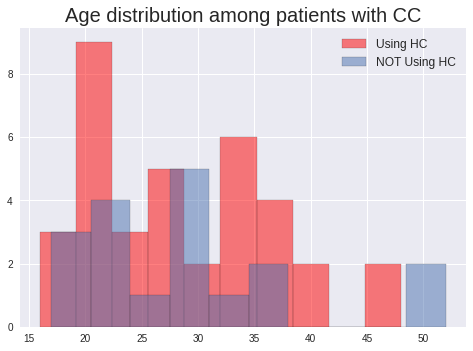

In [191]:
plt.style.use('seaborn')
plt.title('Age distribution among patients with CC', fontsize=20)
with_hc['Age'].hist(bins=10, edgecolor='black', color='red', alpha=0.5,  label='Using HC');
no_hc['Age'].hist(bins=10, edgecolor='black', alpha=0.5,  label='NOT Using HC')
plt.legend(fontsize=12); 


- In the plot above, we will notice that using Hormonal Contraceptive (red bars) caused more women to develop CC in earlier age compared to those that didn't use HC. 

###Part 4 - Modeling

In [192]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [193]:
df_ml.duplicated().sum()

0

In [194]:
df_ml['Biopsy'].value_counts(normalize=True)

0    0.935329
1    0.064671
Name: Biopsy, dtype: float64

- This dataset, just like most of the datasets for deseases like cancer, considered 'rare', is inbalanced for the target. So before applying any model, we will work on handleling this imbalance and also the missing values.

- I will handle missing values, scale and encode, apply SMOTE and transform first, then I'll trst a few different models. Some Classification models don't need scaling but, to make this preparation unique, so i don't have to redo it for each model, I'll just do it now.

In [195]:
X = df_ml.drop(columns='Biopsy')
y = df_ml['Biopsy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [196]:
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

pipe1 = make_pipeline(freq_imputer,scaler)


In [197]:
pipe1.fit(X_train)
X_train_processed = pipe1.transform(X_train)
X_test_processed = pipe1.transform(X_test)

In [198]:
smote = SMOTE(sampling_strategy='auto')

X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

y_train_smote.value_counts()

0    586
1    586
Name: Biopsy, dtype: int64

**- From now on, for my models, I will work with:**
  - X_train_smote, y_train_smote / X_test_processed, y_test


####**4.1)** Try multiple models and tune the hyperparameters of each model to optimize model performance

- Model 1 - Random Forrest

In [199]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_smote, y_train_smote)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [200]:
rf_param_grid ={ 'max_depth':range(1,20),  'n_estimators': [ 10, 50, 100, 150]  }
rf_pipe_gs = GridSearchCV(rf, rf_param_grid)
rf_pipe_gs.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 20),
                         'n_estimators': [10, 50, 100, 150]})

In [201]:
rf_pipe_gs.best_params_
rf_best_pipe = rf_pipe_gs.best_estimator_
rf_best_pipe.fit(X_train_smote, y_train_smote)
best_score_rf = rf_best_pipe.score(X_test_processed, y_test)
best_score_rf 

0.9617224880382775

In [202]:
#making predictions to evaluate other metrics
rf_pred_train = rf_best_pipe.predict(X_train_smote)
rf_pred_test = rf_best_pipe.predict(X_test_processed)

print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       195
           1       0.69      0.79      0.73        14

    accuracy                           0.96       209
   macro avg       0.84      0.88      0.86       209
weighted avg       0.96      0.96      0.96       209



- Model 2 - KNN

In [203]:
knn = KNeighborsClassifier() 
knn.fit(X_train_smote, y_train_smote)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [204]:
knn_param_grid ={'n_neighbors':range(1,20)}

In [205]:
knn_pipe_gs = GridSearchCV(knn, knn_param_grid)
knn_pipe_gs.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [206]:
knn_pipe_gs.best_params_
knn_best_pipe = knn_pipe_gs.best_estimator_
knn_best_pipe.fit(X_train_smote, y_train_smote)
best_score_knn = knn_best_pipe.score(X_test_processed, y_test)
best_score_knn

0.9186602870813397

In [207]:
knn_pred_train = knn_best_pipe.predict(X_train_smote)
knn_pred_test = knn_best_pipe.predict(X_test_processed)
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       195
           1       0.40      0.43      0.41        14

    accuracy                           0.92       209
   macro avg       0.68      0.69      0.69       209
weighted avg       0.92      0.92      0.92       209



- Model 3 - LightGBM

In [208]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_smote, y_train_smote)
lgbm.score(X_test_processed, y_test)

0.9617224880382775

In [209]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [210]:
lgbm_param_grid ={'n_estimators':[10,50,100,150] }

In [211]:
lgbm_pipe_gs = GridSearchCV(lgbm, lgbm_param_grid)
lgbm_pipe_gs.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=LGBMClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 150]})

In [212]:
lgbm_pipe_gs.best_params_

lgbm_best_pipe = lgbm_pipe_gs.best_estimator_

lgbm_best_pipe.fit(X_train_smote, y_train_smote)
lgbm_best_pipe.score(X_test_processed, y_test)

0.9617224880382775

In [213]:
lgbm_pred = lgbm_best_pipe.predict(X_test_processed)

print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       195
           1       0.69      0.79      0.73        14

    accuracy                           0.96       209
   macro avg       0.84      0.88      0.86       209
weighted avg       0.96      0.96      0.96       209



  #### **4.2)** Perform PCA or another feature engineering technique on the dataset to see how this impacts the results.

- Based on precision, recall and accuracy, I will proceed with Lgbm Model

For the sake of practicing, I will apply PCA to this dataset, however, when it comes to diagnosts we usually will favor a more sensitive model.
Because we have the target, I will also try LDA.

According to [this article](https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/), For datasets with more classification type features, and when you are more interestes in a finer result rather than reducing your data, LDA should do a better job than PCA. Let's see!

- PCA

In [214]:
model = lgbm_best_pipe #same model, just adjusting for best typing

In [215]:
pca = PCA(n_components=.95)

In [216]:
model_pca = make_pipeline(pca,model)
model_pca.fit(X_train_smote, y_train_smote)
model_pca_pred = model_pca.predict(X_test_processed)
model_pca.score(X_test_processed, y_test)

0.9282296650717703

In [217]:
print(classification_report(y_test, model_pca_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       195
           1       0.45      0.36      0.40        14

    accuracy                           0.93       209
   macro avg       0.70      0.66      0.68       209
weighted avg       0.92      0.93      0.92       209



- LDA

In [218]:
lda = LDA(n_components=1)

model_lda = make_pipeline(lda,model)
model_lda.fit(X_train_smote, y_train_smote)
model_lda_pred = model_lda.predict(X_test_processed)
model_lda.score(X_test_processed, y_test)

0.9234449760765551

In [219]:

print(classification_report(y_test, model_lda_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       195
           1       0.46      0.86      0.60        14

    accuracy                           0.92       209
   macro avg       0.73      0.89      0.78       209
weighted avg       0.95      0.92      0.93       209



- PCA has not improved our model, LDA imporved recall, but made precision worse, our model became more bias

####**4.3)** Other metrics for our model

-  We will proceed using Lgbm without any dimensionality reduction

In [220]:
#Reviewing Scores, fitting again to reset the model

model.fit(X_train_smote, y_train_smote)
model.score(X_test_processed, y_test)
prediction = model.predict(X_test_processed)
prediction_train = model.predict(X_train_smote)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       195
           1       0.69      0.79      0.73        14

    accuracy                           0.96       209
   macro avg       0.84      0.88      0.86       209
weighted avg       0.96      0.96      0.96       209



***Let's interpret our results!***

- **Accuracy:** Our model is able to explain 96% of the variation on the diagnosis predcted, namely, out of 100 tests, 96% will be correct.
- **Recall:** Recall measures if our model tested negative for someone that shoul be testes as positive, namely a "false negative", in our case, that would be 79% of the time.
- **Precision:** Precision will measure how many times our model made an incorrect prediction for positive cases of CC, a false positeve, we would like a score = 1, meaning no false positives, our model scored 69%.

***We can also visuzalize the information above on the plot below:***

In [221]:
classes = ['CC Negative', 'CC Positive']

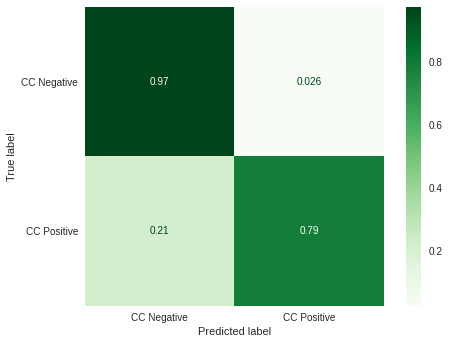

In [222]:
ConfusionMatrixDisplay.from_predictions(y_test, prediction, cmap='Greens', display_labels=classes, normalize='true')
plt.grid(False)
plt.savefig('confusion_matrix.jpg');

***Above we can see how True results and predicted results relate to each other***

In [223]:
print(f'Testing AUC: {roc_auc_score(y_test, model.predict_proba(X_test_processed)[:,1]).round(4)}')

Testing AUC: 0.8641


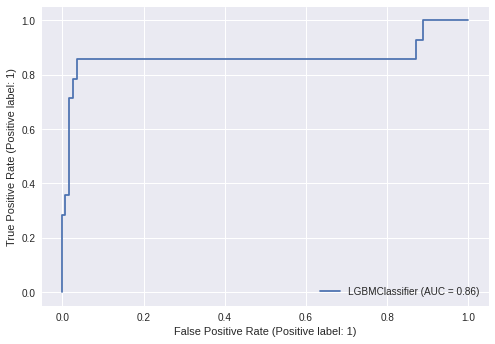

In [224]:
RocCurveDisplay.from_estimator(model, X_test_processed, y_test);


- And finally , **AUC**, which describes the ability of our model to distinguish between a classe, in our case, a positive diagnosis and a negative one, this is an important metric because among positives and negatives we are measuaring a very imbalanced total, and detecting the rare case among the commun one is important.

### Conclusion

- For this case, a false posite and a false negative are very serious errors, a patient without cancer should not be subimitted to treatment, and a positive result can't go untreated.
- Having that in mind, I still believe that our model is useful, however I would suggest that a second measure would be used to confirm the results prior to treatment or dismissal of treatment.